Waste managerment using CNN Nodel

In [1]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


Libraries required

In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')

In [3]:
train_path = "DATASET/DATASET/TRAIN"
test_path = "DATASET/DATASET/TEST"

In [92]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Activation,Dropout,Flatten,Dense,BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator,img_to_array,load_img
from tensorflow.keras.utils import plot_model
from glob import glob

In [77]:
#Visualization
x_data =[]
y_data =[]
for category in glob(train_path+"/*"):
    for file in tqdm(glob(category+"/*")):
        img_array = cv2.imread(file)
        img_array = cv2.cvtColor(img_array,cv2.COLOR_BGR2RGB)
        x_data.append(img_array)
        y_data.append(category.split('/')[-1])
data = pd.DataFrame({'image':x_data,"label":y_data})


100%|██████████| 9999/9999 [01:02<00:00, 160.72it/s]


In [6]:
data.shape
data.dtypes

image    object
label    object
dtype: object

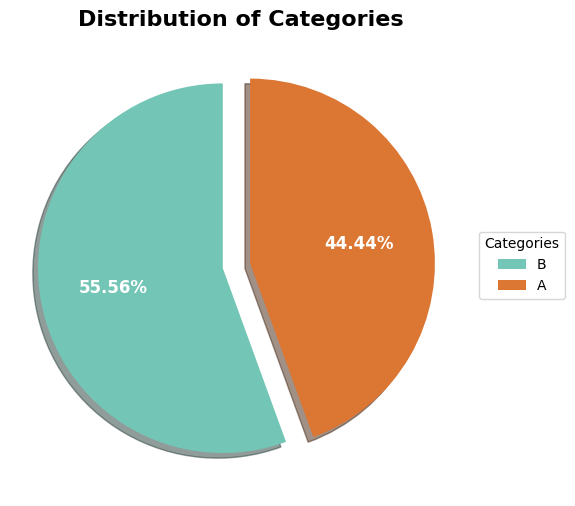

In [84]:

if len(value_counts) == 2:
    labels = value_counts.index.tolist()  
    counts = value_counts.values.tolist()  

   
    colors = ["#73c6b6", "#dc7633"]
    explode = [0.1 if count == max(counts) else 0.05 for count in counts]  

    
    fig, ax = plt.subplots(figsize=(8, 6))
    wedges, texts, autotexts = ax.pie(
        counts,
        labels=labels,
        autopct="%0.2f%%",
        colors=colors,
        startangle=90,
        explode=explode,
        shadow=True,
        textprops={'color': "w"},
    )
    
    ax.legend(wedges, labels, title="Categories", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
    plt.setp(autotexts, size=12, weight="bold")
    plt.title("Distribution of Categories", fontsize=16, weight="bold")
    plt.show()

else:
    print(f"Error: The data doesn't contain exactly two categories. Found {len(value_counts)} categories.")

In [74]:

print(data.keys())

dict_keys(['Category'])


In [78]:
print(data.columns)

Index(['image', 'label'], dtype='object')


In [64]:
print(f"Length of images: {len(images)}")
print(f"Length of categories: {len(category)}")

Length of images: 1
Length of categories: 23


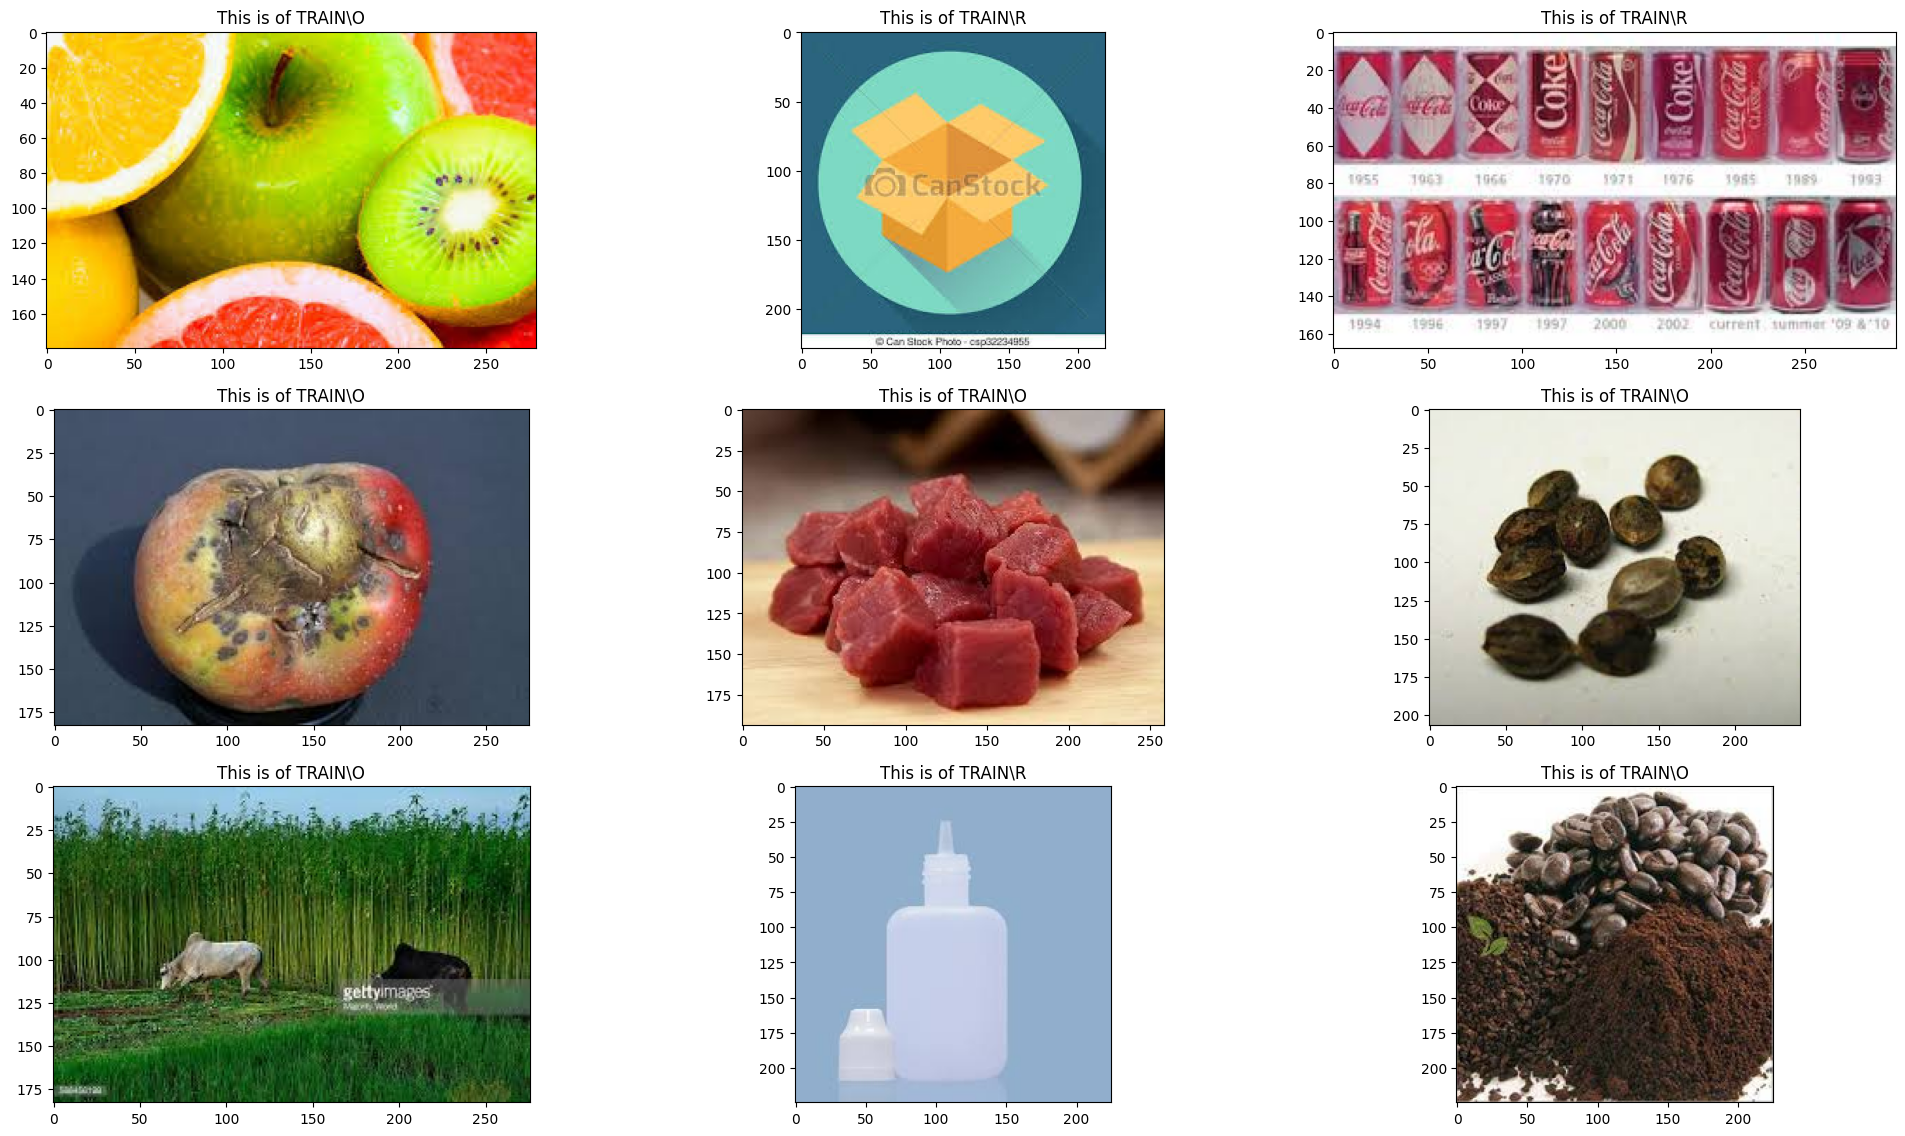

In [86]:
plt.figure(figsize=(20, 15))
for i in range(9):
    plt.subplot(4, 3,(i%12)+1)
    index = np.random.randint(15000)
    plt.title('This is of {0}'.format(data.label[index]))
    plt.imshow(data.image[index])
    plt.tight_layout()

In [93]:
model = Sequential()

# 1st Convolutional Block
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(224, 224, 3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

# 2nd Convolutional Block
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

# 3rd Convolutional Block
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

# 4th Convolutional Block
model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

# Global Average Pooling to reduce parameters
model.add(GlobalAveragePooling2D())

# Fully Connected Layers
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))

# Output Layer (Binary Classification: Organic vs Plastic)
model.add(Dense(1, activation='sigmoid'))

# Compile the Model
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])


In [94]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_11 (Conv2D)              │ (None, 224, 224, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 224, 224, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 112, 112, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 112, 112, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 56, 56, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 28, 28, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 28, 28, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 28, 28, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 14, 14, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 256)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 489,153 (1.87 MB)

 Trainable params: 488,193 (1.86 MB)

 Non-trainable params: 960 (3.75 KB)

In [95]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

val_datagen = ImageDataGenerator(rescale=1./255)

In [99]:
import os
import shutil

base_dir = "dataset"
correct_dirs = ["train", "test", "val"]
class_names = ["organic", "recyclable"]  # Ensure consistent names

# Remove duplicate folders if they exist
for d in os.listdir(base_dir):
    if d not in correct_dirs:
        shutil.rmtree(os.path.join(base_dir, d), ignore_errors=True)

# Ensure only one correct structure exists
for dir_name in correct_dirs:
    for class_name in class_names:
        os.makedirs(os.path.join(base_dir, dir_name, class_name), exist_ok=True)

print("Dataset folders are now correctly structured!")

Dataset folders are now correctly structured!


In [101]:
import os
print(os.listdir("dataset/train"))
print(os.listdir("dataset/test"))

['organic', 'recyclable']
['organic', 'recyclable']


In [105]:
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255) 

In [107]:
train_generator = train_datagen.flow_from_directory(
    'dataset/train',
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary')

val_generator = val_datagen.flow_from_directory(
    'dataset/val',
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary')

test_generator = test_datagen.flow_from_directory(
    'dataset/test',
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary')

Found 7149 images belonging to 2 classes.
Found 2039 images belonging to 2 classes.
Found 2039 images belonging to 2 classes.


In [108]:
hist = model.fit(
    train_generator, 
    epochs=10, 
    validation_data=test_generator
)

Epoch 1/10
224/224 ━━━━━━━━━━━━━━━━━━━━ 386s 2s/step - accuracy: 0.8666 - loss: 0.3493 - val_accuracy: 0.6660 - val_loss: 0.4893
Epoch 2/10
224/224 ━━━━━━━━━━━━━━━━━━━━ 350s 2s/step - accuracy: 0.8980 - loss: 0.2450 - val_accuracy: 0.7778 - val_loss: 0.4285
Epoch 3/10
224/224 ━━━━━━━━━━━━━━━━━━━━ 349s 2s/step - accuracy: 0.9077 - loss: 0.2200 - val_accuracy: 0.9382 - val_loss: 0.1685
Epoch 4/10
224/224 ━━━━━━━━━━━━━━━━━━━━ 353s 2s/step - accuracy: 0.9293 - loss: 0.1900 - val_accuracy: 0.9431 - val_loss: 0.1649
Epoch 5/10
224/224 ━━━━━━━━━━━━━━━━━━━━ 352s 2s/step - accuracy: 0.9304 - loss: 0.1719 - val_accuracy: 0.8377 - val_loss: 0.3374
Epoch 6/10
224/224 ━━━━━━━━━━━━━━━━━━━━ 353s 2s/step - accuracy: 0.9347 - loss: 0.1706 - val_accuracy: 0.9416 - val_loss: 0.1983
Epoch 7/10
224/224 ━━━━━━━━━━━━━━━━━━━━ 353s 2s/step - accuracy: 0.9294 - loss: 0.1809 - val_accuracy: 0.9161 - val_loss: 0.2192
Epoch 8/10
224/224 ━━━━━━━━━━━━━━━━━━━━ 351s 2s/step - accuracy: 0.9355 - loss: 0.1656 - val_accu